In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split 
from xgboost import XGBRegressor
from sklearn import metrics

importing dataset

In [4]:
houseprice_ds=pd.read_csv("BostonHousing.csv")

In [5]:
houseprice_ds

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
houseprice_ds["price"]=houseprice_ds["medv"]

In [8]:
houseprice_ds

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,22.0


In [10]:
houseprice_ds=houseprice_ds.drop("medv",axis=1)

In [11]:
houseprice_ds

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [12]:
houseprice_ds.shape

(506, 14)

In [13]:
houseprice_ds.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

statistical measures

In [15]:
houseprice_ds.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


understanding correlation between features

In [16]:
correlation=houseprice_ds.corr()

finding correlation u sing heatmap

<Axes: >

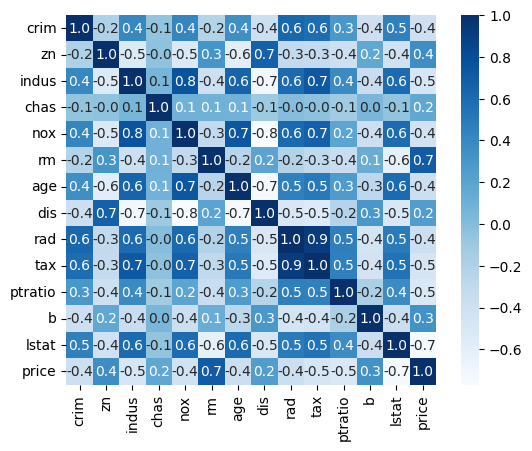

In [25]:
plt.Figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={"size":10},cmap="Blues")

Splitting data

In [26]:
X=houseprice_ds.drop("price",axis=1)

In [27]:
Y=houseprice_ds["price"]

In [28]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [29]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.20,random_state=1)

In [ ]:
# xtrain.shape
# xtest.shape
# ytrain.shape
# ytest.shape

(102,)

model training

In [36]:
model=XGBRegressor()

In [37]:
model.fit(xtrain,ytrain)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Evaluation

In [38]:
trainingdataprediction=model.predict(xtrain)

In [39]:
trainingdataprediction

array([25.281103 , 23.31412  ,  7.204563 , 21.167564 , 11.704863 ,
       27.000803 , 29.591314 , 26.50979  , 43.503834 , 23.619799 ,
       10.999919 , 33.391537 , 36.00788  , 36.399265 , 19.028671 ,
       20.198929 , 34.90926  , 50.00035  , 19.294802 , 14.885604 ,
       26.626898 , 19.8843   , 24.790934 , 21.192629 , 23.910225 ,
       20.588547 , 23.09622  , 27.991076 , 19.985487 , 23.101835 ,
       24.99628  ,  9.698857 , 23.894276 , 36.081387 , 13.397239 ,
       12.741484 , 39.79849  , 10.396599 , 20.601946 , 17.743242 ,
       19.490051 , 23.71323  , 28.501348 , 24.276476 , 23.790792 ,
       19.052214 , 28.378448 , 20.498322 , 33.819885 , 14.499767 ,
       20.385319 , 15.997922 , 13.303482 , 30.782928 , 27.491224 ,
       24.391848 , 24.398573 , 25.154491 , 43.82388  , 21.91346  ,
       26.215363 , 14.224116 , 20.787481 , 20.102007 , 23.096603 ,
       13.075941 , 16.20462  , 24.796045 , 20.210478 , 22.490742 ,
       14.797893 , 28.697199 , 20.108065 , 23.393608 , 31.9924

evaluation metric
R-Squared
mean absolute error

In [ ]:
score_1=metrics.r2_score(ytrain,trainingdataprediction)
score_2=metrics.mean_absolute_error(ytrain,trainingdataprediction)

In [42]:
print(score_1,"score_1")
print(score_2,"score_2")

0.9999958965172508 score_1
0.012576152310513095 score_2


In [43]:
testing_data_predictioin=model.predict(xtest)

In [44]:
testing_data_predictioin

array([28.25244 , 28.731762, 18.859758, 20.687983, 20.842443, 20.084587,
       27.262035, 19.040174, 20.424143, 22.99985 , 31.539501, 32.43339 ,
       19.99154 , 19.19272 , 18.38373 , 23.393026, 12.879418, 44.124924,
       22.569138, 15.028631, 19.734686, 18.650427, 23.859623, 23.27529 ,
       26.142296,  8.619358, 13.851447, 19.234715, 46.480568, 11.461556,
       26.717323, 18.072702, 48.522766, 17.746061, 23.836948, 21.050343,
       17.154285, 32.513588, 13.949366, 21.935308, 23.592558, 22.57608 ,
       25.441147, 17.784962, 14.075541,  9.252019, 48.64045 , 11.04867 ,
       20.893543, 19.030233, 23.082336, 21.25865 , 24.094666, 19.282824,
        8.737773, 22.928942, 11.748472, 24.429935, 20.31184 , 40.367107,
       16.695768, 25.689665, 12.417592, 13.474819, 15.777904, 35.544815,
       40.422913, 23.272434, 21.224659, 21.147192, 24.85442 ,  7.758489,
       16.823906, 19.874205, 19.171438, 20.44447 , 43.658875, 24.214212,
       29.324774, 31.244894, 16.663187, 18.560524, 

In [46]:
score_1_test=metrics.r2_score(ytest,testing_data_predictioin)
score_2_test=metrics.mean_absolute_error(ytest,testing_data_predictioin)

In [47]:
print(score_1_test,"score_1_test")
print(score_2_test,"score_2_test")

0.9023156219019987 score_1_test
2.3501096061631745 score_2_test


Visualising the actual and preedicted values

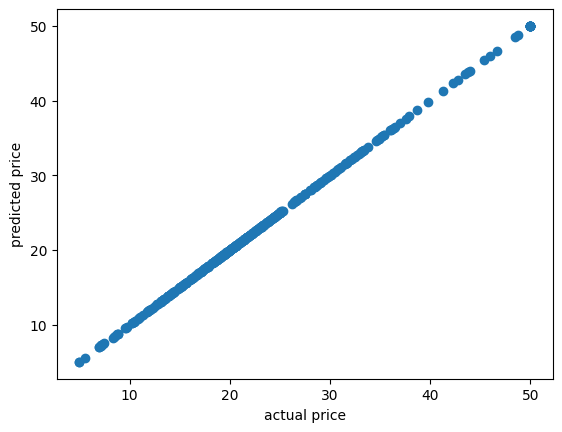

In [48]:
plt.scatter(ytrain,trainingdataprediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

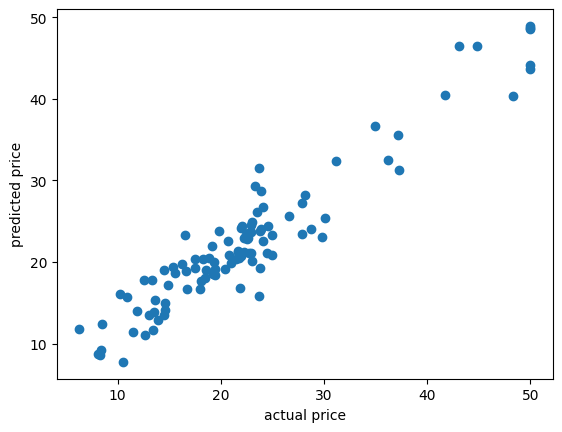

In [50]:
plt.scatter(ytest,testing_data_predictioin)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.show

In [49]:
xtest.shape

(102, 13)